In [9]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import pandas as pd

## " " 안에 경로지정해주기

In [76]:
N = 6805
X = pd.read_csv(" ")
Y = X["class"]
Y = pd.DataFrame(Y)
del X["class"]

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X_train_sc.reset_index(drop=True, inplace=True)
X_test_sc.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [78]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train_sc, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
from sklearn.linear_model import Ridge
alphas=np.logspace(-6, 6, 500)

In [80]:
def Ridge_Reg(X_train_sc, Y_train, X_test_sc, Y_test, alphas, fig=False):
    
    ## How to Ridge?##
    #1. Call Ridge function as an object
    reg = Ridge()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(X_train_sc, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(X_train_sc)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(X_test_sc)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
   
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = X_train_sc.columns
        for i in range(X_train_sc.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

Weight: [[ 2.097e-02 -5.803e-03 -4.148e-03  2.462e-04  1.737e-03 -6.011e-03
   3.392e-03  1.817e-02 -2.206e-02  1.215e-02  5.752e-03  9.715e-04
   3.142e-03 -3.081e-03  7.324e-03  7.910e-03 -3.492e-04 -3.515e-03
  -2.640e-03  5.321e-03 -2.925e-04  4.730e-03  2.311e-03  1.414e-02
   5.761e-03 -6.770e-03  8.244e-04 -3.149e-03  1.875e-03  7.137e-04
   6.186e-01]]


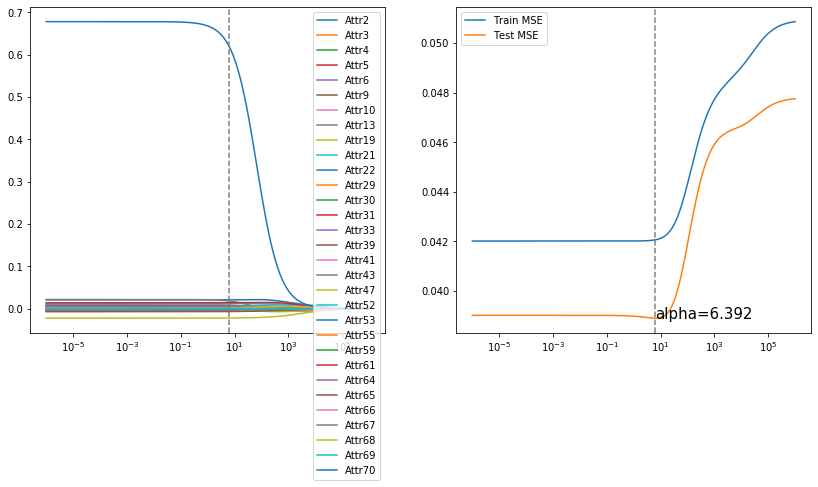

In [65]:
Ridge_output = Ridge_Reg(X_train_sc, Y_train, X_test_sc, Y_test, alphas, fig=True)

In [81]:
def Lasso_Reg(X_train_sc, Y_train, X_test_sc, Y_test, alphas, fig=False):
    
    ## How to Lasso?##
    #1. Call Lasso function as an object
    reg = Lasso()
    
    coefs = []
    train_MSE = []
    test_MSE = []
    
    for a in alphas:
        #2. Choose your lambda (Regularization coefficient)
        reg.set_params(alpha=a)
        
        #3. Fit your model
        reg.fit(X_train_sc, Y_train)
        
        #4 view result with reg.coef_, reg.predict, ...
        coefs.append(reg.coef_)
    
        train_pred = reg.predict(X_train_sc)
        train_MSE.append(mean_squared_error(Y_train, train_pred))
    
        test_pred = reg.predict(X_test_sc)
        test_MSE.append(mean_squared_error(Y_test, test_pred))
    
    ## just for plotting purpose.. trivial ##
    #print(np.array(coefs).shape)
    if fig==True:
        fig = plt.figure(figsize=(14,6))

        ax1 = fig.add_subplot(121)
        labels = X_train_sc.columns
        for i in range(X_train_sc.shape[1]):
            ax1.plot(alphas, np.array(coefs)[:,i], label=labels[i])
        ax1.set_xscale('log')
        ax1.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        ax1.legend()

        ax2 = fig.add_subplot(122)
        ax2.plot(alphas, train_MSE, label='Train MSE')
        ax2.plot(alphas, test_MSE, label='Test MSE')
        ax2.set_xscale('log')
        ax2.axvline(x=alphas[np.argmin(test_MSE)], linestyle='--', color='grey')
        alpha = np.around(alphas[np.argmin(test_MSE)],3)
        ax2.text(alphas[np.argmin(test_MSE)], np.amin(test_MSE), 'alpha={0}'.format(alpha), size=15)
        ax2.legend()

        print("Weight:" ,coefs[np.argmin(test_MSE)])
        
    return {'coefs': coefs, 'train_MSE': train_MSE, 'test_MSE': test_MSE}

In [82]:
from sklearn.linear_model import Lasso
alphas=np.logspace(-6, 6, 500)

Weight: [-9.076e-03 -5.589e-03 -4.729e-04  0.000e+00 -3.550e-03 -3.455e-03
 -1.767e-03  0.000e+00 -1.100e-02 -1.590e-02  1.234e-02 -0.000e+00
  7.006e-04 -2.213e-03 -0.000e+00  2.380e-04  2.256e-04 -0.000e+00
  1.807e-03  9.418e-04 -7.095e-05 -0.000e+00 -0.000e+00  0.000e+00
  0.000e+00  4.859e-03  3.089e-03  7.583e-04  3.134e-04  9.345e-04
  3.727e-04  4.455e-04  1.216e-02 -0.000e+00  4.503e-03  1.275e-03
  0.000e+00  6.140e-01]


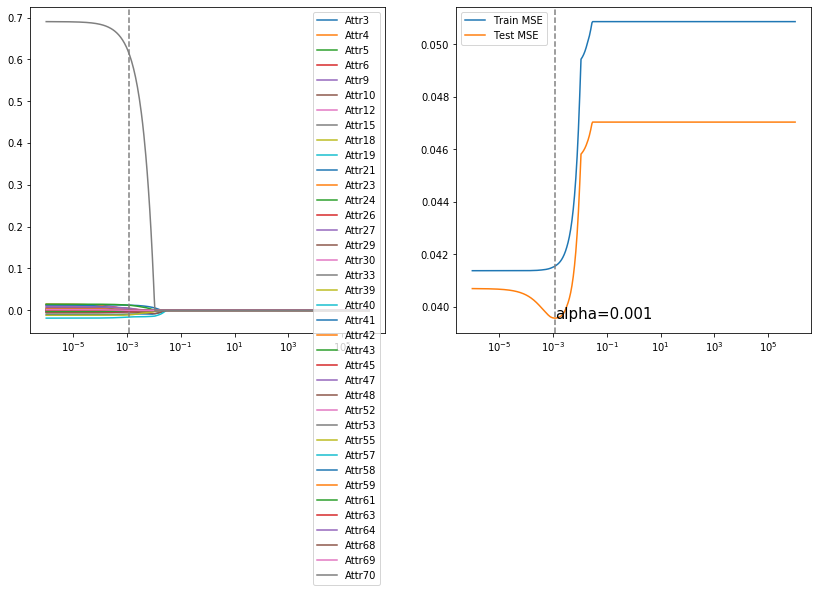

In [83]:
Lasso_output = Lasso_Reg(X_train_sc, Y_train, X_test_sc, Y_test, alphas, fig=True)